In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import random
from sklearn.svm import SVC

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.replace('?',np.nan,inplace = True)

In [5]:
len(df)

48842

In [6]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [7]:
null_cols =['workclass','occupation','native-country'] 

In [8]:
def handle_null(df,cols):
    for col in cols:
        df[col] = df.groupby("income")[col].transform(lambda x: x.fillna(x.mode()[0]))
    return df

In [9]:
df=handle_null(df,null_cols)
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [10]:
df=df.drop_duplicates() 

In [11]:
from sklearn import preprocessing
numeric_cols=df.select_dtypes(include=[np.number]).columns
std=preprocessing.StandardScaler()
df[numeric_cols] = std.fit_transform(df[numeric_cols])

<ipython-input-11-0c284728ca87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numeric_cols] = std.fit_transform(df[numeric_cols])


<ipython-input-12-7752882dd23e>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Blues')


<Axes: >

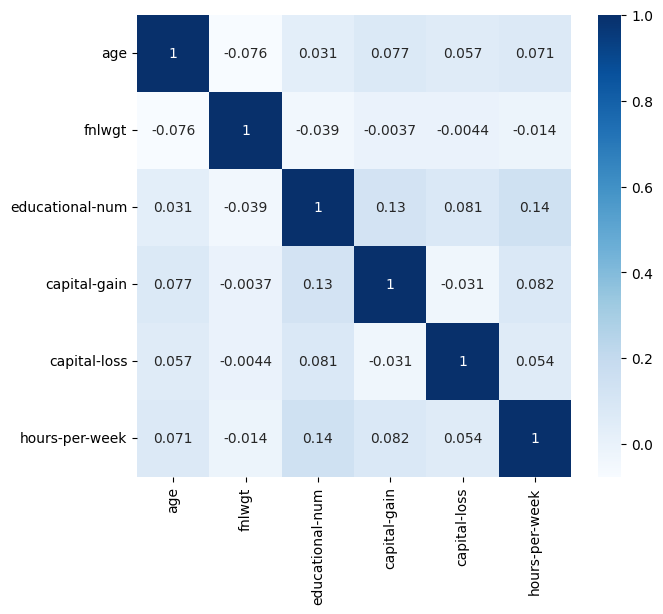

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7,6))
sns.heatmap(df.corr(),annot=True,cmap='Blues')

In [13]:
def handle_catg(df):
    cat_cols=df.select_dtypes(include=[object]).columns
    #convert column catagories to nums
    for col in cat_cols:
        df[col]=df[col].astype(str)
        col_vals=df[col].unique()
        if len(col_vals)==2:
            i=0
            for label in col_vals:
                df[col].replace(label,i,inplace=True)
                i+=1
    df=pd.get_dummies(df
               ,columns =df.select_dtypes(include=[object]).columns 
               ,drop_first = True
               )
    return df

In [14]:
df=handle_catg(df)
df.head()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_Local-gov,workclass_Never-worked,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-0.995929,0.351583,-1.197969,0,-0.144884,-0.217251,-0.034367,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,-0.047609,-0.945440,-0.419771,0,-0.144884,-0.217251,0.772558,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.777086,1.394491,0.747525,0,-0.144884,-0.217251,-0.034367,1,1,0,...,0,0,0,0,0,0,0,1,0,0
3,0.390077,-0.277850,-0.030672,0,0.886245,-0.217251,-0.034367,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-1.506563,-0.815887,-0.030672,1,-0.144884,-0.217251,-0.841291,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<Axes: >

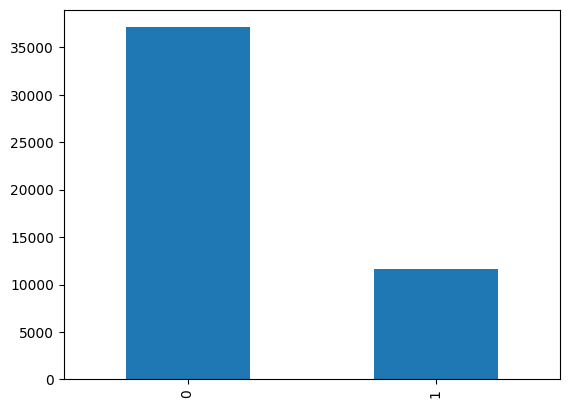

In [15]:
df['income'].value_counts().plot(kind='bar')

In [16]:
class_0_count,class_1_count=df['income'].value_counts()
print(f'class (<=50k) count is {class_0_count} and class (>50k) count is {class_1_count}')

class (<=50k) count is 37109 and class (>50k) count is 11680


In [17]:
class_0=df[df['income']==0]
class_1=df[df['income']==1]

In [18]:
class_1_oversampled=class_1.sample(class_0_count,replace=True)
class_1_oversampled.shape

(37109, 98)

In [19]:
df_oversampled=pd.concat([class_0,class_1_oversampled],axis=0)
df_oversampled.shape

(74218, 98)

<Axes: >

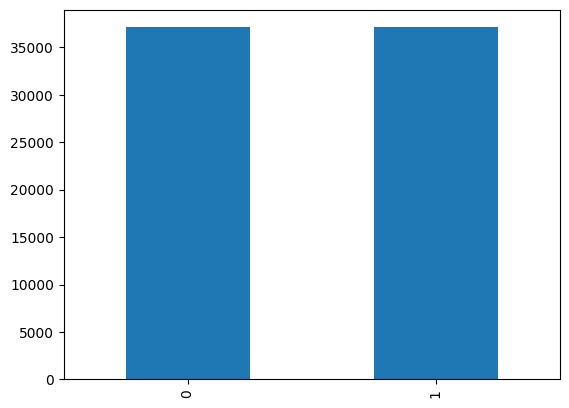

In [20]:
df_oversampled['income'].value_counts().plot(kind='bar')

In [21]:
def corr_reduction(df,thresh):
    df_corr_mat=df.corr()
    correlated_features=set()
    for i in range(len(df_corr_mat.columns)):
        for j in range(i):
            if abs(df_corr_mat.iloc[i, j]) > thresh:
                print(df_corr_mat.columns[i]," ,is highly correlated with, ",df_corr_mat.columns[j])
                colname = df_corr_mat.columns[i]
                correlated_features.add(colname)
    
    df.drop(columns=correlated_features,axis=1,inplace=True)
    print(correlated_features,' are removed from data')


    return df

In [22]:
df_red=corr_reduction(df,0.8)

set()  are removed from data


In [23]:
def corr_feature_selection(df,target_name,thresh):
    df_cor=pd.DataFrame(columns=['correlation with '+target_name])

    for col in df.columns:
        if col!=target_name:
            df_cor.loc[col]=abs(df[target_name].corr(df.loc[:,col]))

    df_cor.sort_values(by=['correlation with '+target_name],inplace=True,ascending=False)
    
    
    #feature selection based on correlation with target
    final_columns=[]
    for i in df_cor.index:
        if df_cor.loc[i,'correlation with '+target_name]>thresh:
            final_columns.append(i)
          
    final_columns.append(target_name)
    df=df.loc[:,final_columns]
    return df,df_cor

In [24]:
print("the shape of data before feature selection is: ",df.shape)
df_final,df_corr=corr_feature_selection(df,'income',0.05)
print("**************************************************************************")
print(df_corr.head())
print("**************************************************************************")
print(df_final.head())
print("**************************************************************************")
print("the shape of data after feature selection is: ",df_final.shape)

the shape of data before feature selection is:  (48789, 98)
**************************************************************************
                                   correlation with income
marital-status_Married-civ-spouse                 0.445644
educational-num                                   0.332829
marital-status_Never-married                      0.318499
occupation_Exec-managerial                        0.235720
age                                               0.230132
**************************************************************************
   marital-status_Married-civ-spouse  educational-num  \
0                                  0        -1.197969   
1                                  1        -0.419771   
2                                  1         0.747525   
3                                  1        -0.030672   
4                                  0        -0.030672   

   marital-status_Never-married  occupation_Exec-managerial       age  \
0                   

In [25]:
from sklearn.metrics import accuracy_score

In [26]:

def fit_function(c,g,k,i,x_train,y_train,x_test,y_test) :
  model = SVC(C = c,kernel = k)
  
  model.fit(x_train,y_train)
  pred = model.predict(x_test)
  score = accuracy_score(y_test,pred)
  #print(score)
  if score > cur_best :
    
    result.append((i,score,k,c,g))

In [27]:
C = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]
kernel = ['rbf', 'linear','poly','sigmoid']
cur_best = 0
result = []

In [28]:
for i in range(10) :
  for j in range(10) :
    sample = df_final[i::5]

    y=sample['income'].values
    X=sample.drop(columns=['income'],axis=1).values
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

    c = random.choice(C)
    g = random.choice(gamma)
    k = random.choice(kernel)
    #print(i,j,c,g,k,end = ' ')
    fit_function(c,g,k,j,x_train,y_train,x_test,y_test)




In [30]:
result.sort(key= lambda x : x[1])

In [32]:
result.reverse()

In [33]:
result

[(5, 0.8626580116159891, 'rbf', 1, 1),
 (2, 0.862363387978142, 'linear', 0.1, 0.001),
 (4, 0.860655737704918, 'linear', 1, 0.001),
 (8, 0.8603142076502732, 'linear', 0.1, 0.01),
 (5, 0.8596311475409836, 'rbf', 1, 0.1),
 (9, 0.8595831909805262, 'linear', 100, 0.001),
 (5, 0.8586065573770492, 'linear', 100, 1),
 (5, 0.8582650273224044, 'rbf', 0.1, 0.0001),
 (4, 0.8582166040314315, 'rbf', 0.1, 0.001),
 (2, 0.85724043715847, 'rbf', 1, 0.1),
 (9, 0.8558743169398907, 'linear', 100, 0.01),
 (9, 0.8548497267759563, 'linear', 100, 0.001),
 (3, 0.8541666666666666, 'linear', 1000, 1),
 (0, 0.8538251366120219, 'rbf', 1, 1),
 (3, 0.8537751964468739, 'poly', 10, 0.01),
 (8, 0.8534335497096003, 'poly', 1, 0.1),
 (3, 0.8531420765027322, 'rbf', 10, 1),
 (4, 0.8524590163934426, 'linear', 0.1, 0.1),
 (3, 0.8524590163934426, 'linear', 1, 0.1),
 (6, 0.851775956284153, 'poly', 1, 1),
 (0, 0.851775956284153, 'linear', 0.1, 0.0001),
 (6, 0.8514344262295082, 'linear', 0.1, 0.1),
 (4, 0.8514344262295082, 'rbf',